In [ ]:
import pandas as pd
dataFrame = pd.read_excel("/content/projetdata.xlsx")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

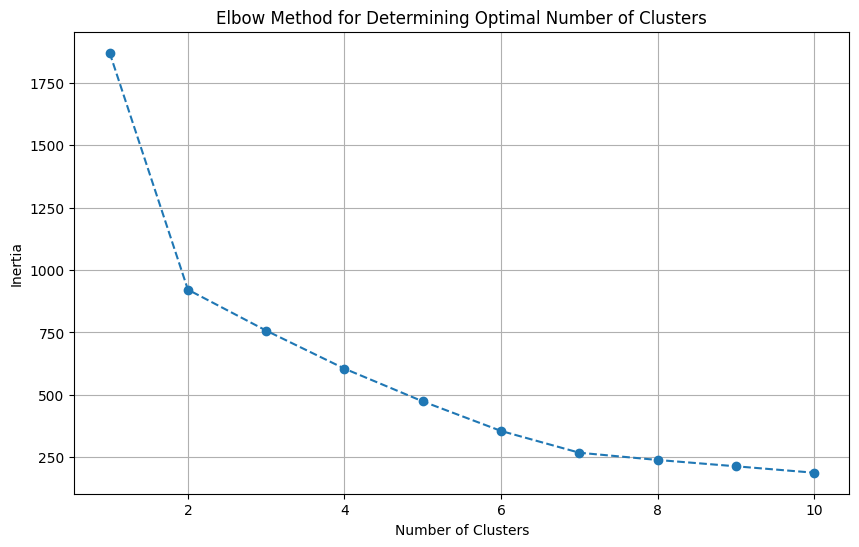

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting relevant features for clustering
features = dataFrame[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
                    'New deaths', 'New recovered', 'Deaths / 100 Cases',
                    'Recovered / 100 Cases', '1 week % increase']]

# Data Preprocessing: Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

We're going to choose 4 clusters at first.

In [ ]:
# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to the original dataset for analysis
dataFrame['Cluster'] = clusters

# Checking the distribution of countries across the clusters
cluster_distribution = dataFrame['Cluster'].value_counts()

cluster_distribution



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    120
3     64
2      2
1      1
Name: count, dtype: int64

Here are some details about the clusters that we chose

In [ ]:
# Calculating the centroids of each cluster
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them back in the original scale
centroids_inverse = scaler.inverse_transform(centroids)

# Converting centroids to a DataFrame for better readability
centroids_df = pd.DataFrame(centroids_inverse, columns=features.columns)

centroids_df


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,1 week % increase
0,3.633290e+04,850.641667,2.900316e+04,6.479100e+03,296.616667,6.65000,282.483333,2.213667,80.309333,7.66975
1,4.290259e+06,148011.000000,1.325804e+06,2.816444e+06,56336.000000,1076.00000,27941.000000,3.450000,30.900000,11.88000
2,1.961224e+06,60513.000000,1.398904e+06,5.018075e+05,33870.500000,625.50000,33663.000000,2.925000,69.935000,21.69500
3,6.105984e+04,4420.656250,2.912652e+04,2.751267e+04,1078.468750,35.78125,710.281250,4.526719,36.149219,24.51125


We observe that there is a cluster with just one country in it and another one with 2. On the other hand we have a cluster with 120 countries and a 64 one. We're going to remake the classification with 3 clusters and see what happens

In [ ]:
# Reapplying K-means with 3 clusters
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3_clusters.fit_predict(features_scaled)

# Updating the dataset with the new cluster labels
dataFrame['Cluster_3'] = clusters_3

# Checking the distribution of countries across the new clusters
cluster_3_distribution = dataFrame['Cluster_3'].value_counts()

cluster_3_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster_3
0    120
2     64
1      3
Name: count, dtype: int64

Here are some details about the clusters that we chose

In [ ]:
# Calculating the centroids of each cluster for the 3-cluster solution
centroids_3 = kmeans_3_clusters.cluster_centers_

# Inverse transform the centroids to get them back in the original scale for interpretation
centroids_3_inverse = scaler.inverse_transform(centroids_3)

# Converting centroids to a DataFrame for better readability
centroids_3_df = pd.DataFrame(centroids_3_inverse, columns=features.columns)

centroids_3_df


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,1 week % increase
0,3.633290e+04,850.641667,2.900316e+04,6.479100e+03,296.616667,6.650000,282.483333,2.213667,80.309333,7.669750
1,2.737569e+06,89679.000000,1.374537e+06,1.273353e+06,41359.000000,775.666667,31755.666667,3.100000,56.923333,18.423333
2,6.105984e+04,4420.656250,2.912652e+04,2.751267e+04,1078.468750,35.781250,710.281250,4.526719,36.149219,24.511250


Lets now apply K-means algorithm to assign the clusters but

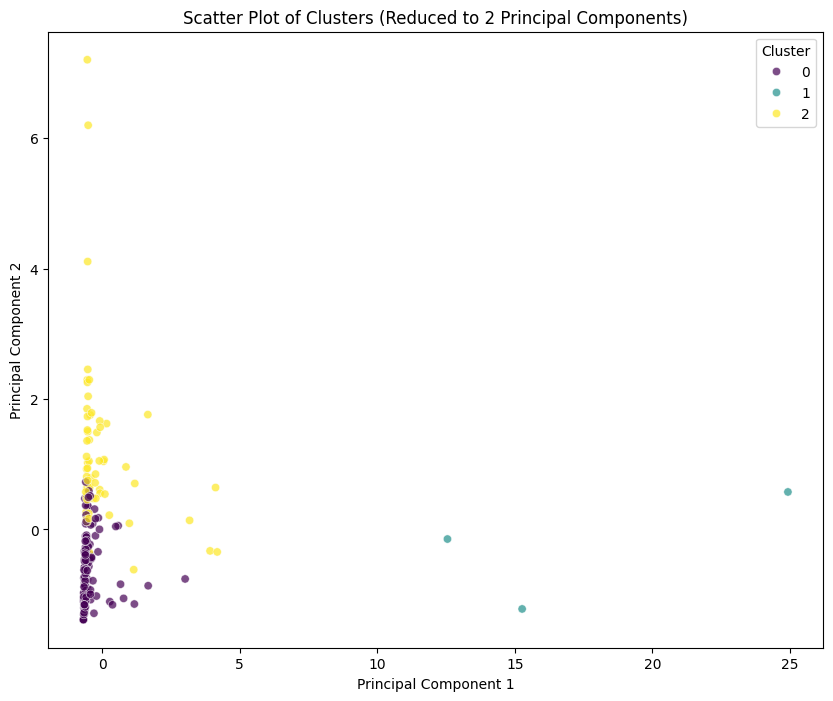

In [ ]:
import seaborn as sns

# Plotting the scatter plots for the first two principal components, colored by cluster
# We'll use PCA to reduce the data to two dimensions for visualization
from sklearn.decomposition import PCA

# Reducing the data to two dimensions
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# Creating a DataFrame for the reduced data
reduced_df = pd.DataFrame(features_reduced, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = dataFrame['Cluster_3']

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Clusters (Reduced to 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Kmeans algorithm from scratch without sklearn

In [ ]:
import numpy as np

def initialize_centroids(points, k):
    """Randomly initialize k centroids from the dataset."""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """Find the closest centroid for all points."""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(points, closest, centroids):
    """Update the centroids based on current cluster assignment."""
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    return new_centroids

def k_means(points, k, max_iterations=100, tolerance=1e-4):
    """Implement k-means clustering from scratch."""
    centroids = initialize_centroids(points, k)
    for _ in range(max_iterations):
        closest = closest_centroid(points, centroids)
        new_centroids = update_centroids(points, closest, centroids)

        # Check for convergence (if centroids do not change)
        if np.allclose(centroids, new_centroids, rtol=tolerance):
            break
        centroids = new_centroids

    # Final assignments and centroids
    return closest, centroids

# Using the scaled features for clustering
k = 3
clusters, centroids = k_means(features_scaled, k)

# Check the first few cluster assignments to verify
clusters[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

These are the first iterations of the kmeans algorithm

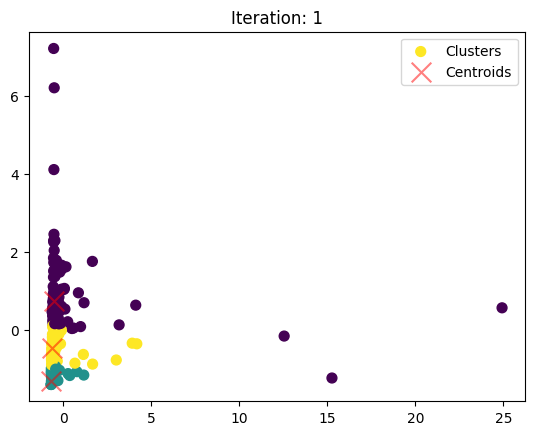

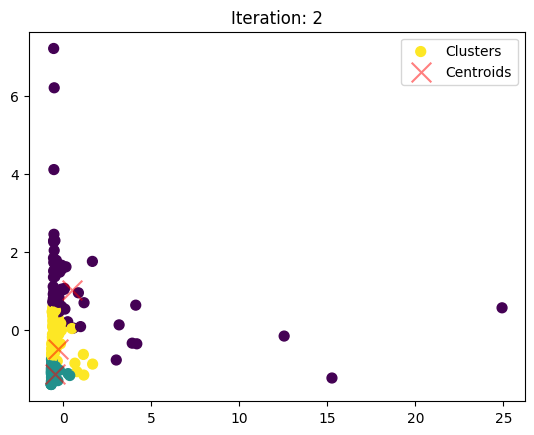

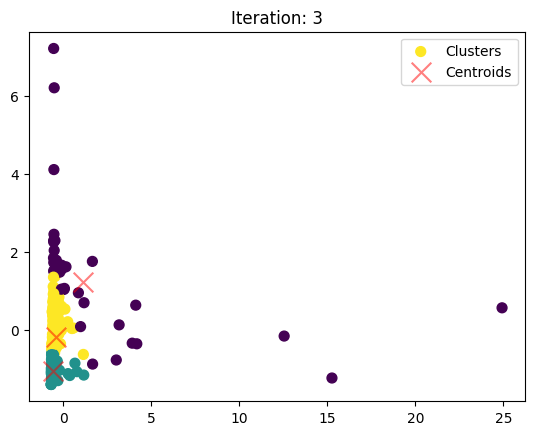

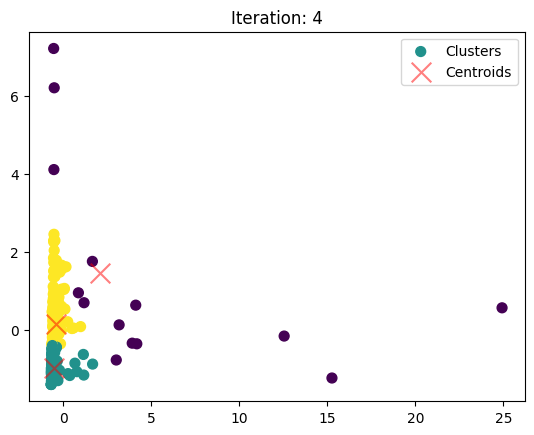

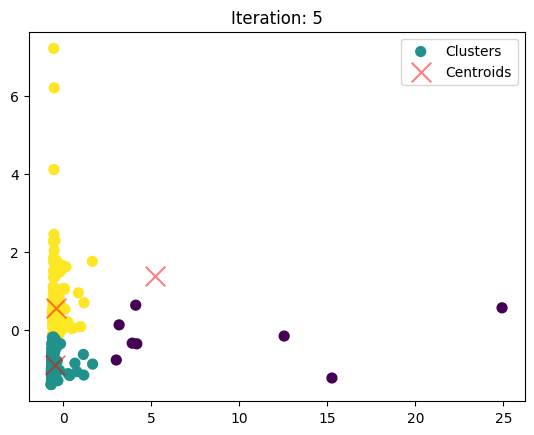

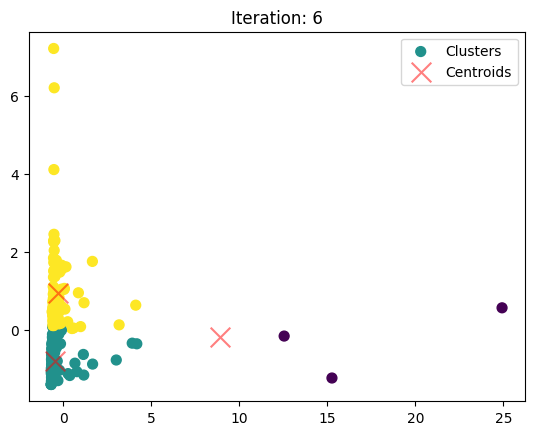

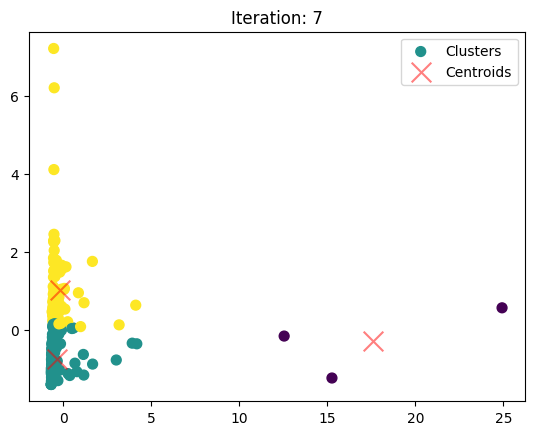

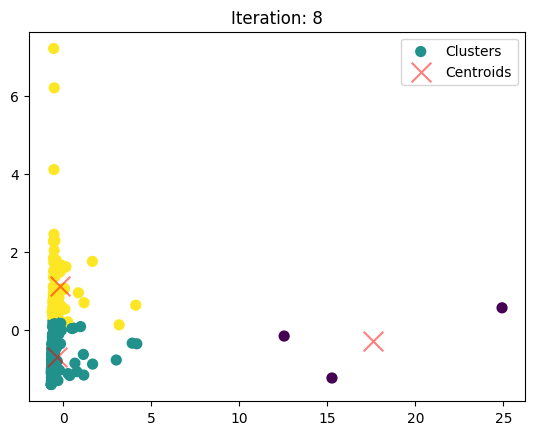

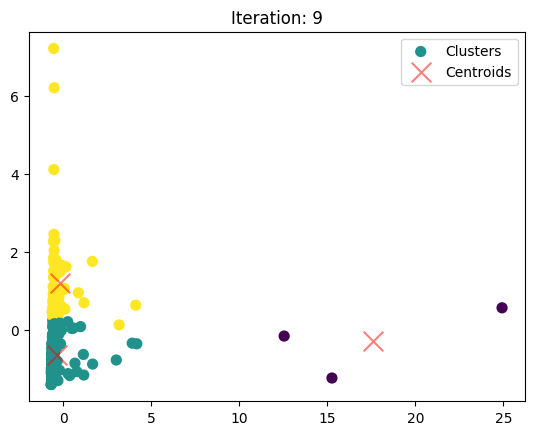

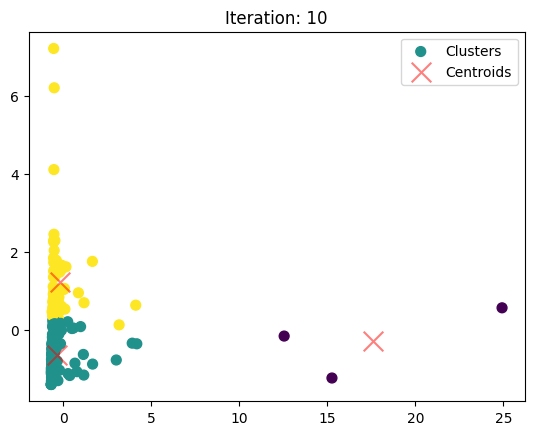

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Load the dataset
dataFrame = pd.read_excel("/content/projetdata.xlsx")

# Step 2: Preprocess and scale the features
features = dataFrame[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', '1 week % increase']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Reduce dimensionality
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# The following function plots clusters and centroids
def plot_clusters(X, centroids, labels, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', marker='o', label='Clusters')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='x', label='Centroids')
    plt.title(f"Iteration: {iteration + 1}")
    plt.legend()
    plt.show()

# Modified K-means to include visualization
def kmeans_visualize(X, n_clusters, max_iters=10):
    # Randomly initialize centroids
    rng = np.random.RandomState(42)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centroids = X[i]

    for iteration in range(max_iters):
        # Assign labels based on closest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Visualization
        plot_clusters(X, centroids, labels, iteration)

        # Calculate new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

# Apply the visualization on the reduced dataset
kmeans_visualize(features_reduced, n_clusters=3)

